In [33]:
from pde import CartesianGrid, WavePDE, ScalarField, MemoryStorage, movie, FieldCollection, DataTracker
from pde.pdes.base import expr_prod
import matplotlib.pyplot as plt
import numpy as np
import numba as nb
from numba import jit
from IPython.display import Video

In [34]:
NX = 64

In [52]:
def generate_matrix(NX, SPEED):
    matrix = np.full((NX, NX), SPEED)  # Initialize the matrix with all values set to SPEED

    # Calculate the center and side length of the square
    center = NX // 2
    side_length = NX // 2

    # Define the coordinates for the square
    start_row, end_row = center - side_length // 2, center + side_length // 2 + 1
    start_col, end_col = center - side_length // 2, center + side_length // 2 + 1

    # Set the square and center of each side to SPEED
    matrix[center - side_length // 2:1+center - side_length // 2, start_col:end_col] = 0
    matrix[center + side_length // 2:1+center + side_length // 2, start_col:end_col] = 0
    matrix[start_row:end_row, center - side_length // 2:1+center - side_length // 2] = 0
    matrix[start_row:end_row, center + side_length // 2:1+center + side_length // 2] = 0
    
    matrix[center:, center] = SPEED
    return matrix

SPEED = 0.05
speed = generate_matrix(NX, SPEED)

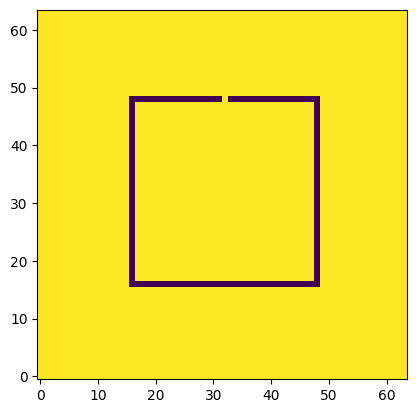

In [53]:
grid = CartesianGrid([[0, 10], [0, 10]], [NX, NX], periodic=[True, True])

initial_density = ScalarField(grid)
initial_density.insert([5, 8], 1)

bc = None# [[{"": 0}, {"derivative": 0}], [{"derivative": 0}, {"derivative": 0}]]

plt.imshow(speed, vmin=0, vmax=SPEED, cmap="viridis", origin="lower")
plt.show()

eq = WavePDE(speed.T)
initial_condition = eq.get_initial_condition(initial_density)

In [54]:
dt = 0.01
seconds = 1

storage = MemoryStorage()
result = eq.solve(initial_condition, t_range=seconds/dt, dt=dt, tracker=["progress", storage.tracker(1, transformation=lambda x: x["u"])])
#result.plot()
movie(storage, filename="test.mp4", progress=False, show_time=True, plot_args={"vmin":np.min(result.data), "vmax":np.max(result.data), "cmap": "viridis"}, movie_args={"dpi":300})
#plt.show()

  0%|          | 0/100.0 [00:00<?, ?it/s]

In [55]:
%%HTML
<video width="640" controls>
  <source src="test.mp4" type="video/mp4">
</video>